# Ensemble Learning

## Initial Imports

In [1]:
## This was all in the starter code.

import warnings
warnings.filterwarnings('ignore')

In [2]:
## This was all in the starter code.

import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter

In [3]:
## This was all in the starter code.

from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced

## I got this from my study group; they said I needed it.
## This was dropped in my chat and I copy/pasted it here.

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import ClusterCentroids
from imblearn.combine import SMOTEENN

from collections import Counter

## Read the CSV and Perform Basic Data Cleaning

In [4]:
# Load the data
## I moved the .csv files into my working directory when I downloaded them.

file_path = Path('LoanStats_2019Q1.csv')
df = pd.read_csv(file_path)

# Preview the data
df.head()

,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,dti,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
0,10500.0,0.1719,375.35,RENT,66000.0,Source Verified,Mar-2019,low_risk,n,27.24,...,85.7,100.0,0.0,0.0,65687.0,38199.0,2000.0,61987.0,N,N
1,25000.0,0.2000,929.09,MORTGAGE,105000.0,Verified,Mar-2019,low_risk,n,20.23,...,91.2,50.0,1.0,0.0,271427.0,60641.0,41200.0,49197.0,N,N
2,20000.0,0.2000,529.88,MORTGAGE,56000.0,Verified,Mar-2019,low_risk,n,24.26,...,66.7,50.0,0.0,0.0,60644.0,45684.0,7500.0,43144.0,N,N
3,10000.0,0.1640,353.55,RENT,92000.0,Verified,Mar-2019,low_risk,n,31.44,...,100.0,50.0,1.0,0.0,99506.0,68784.0,19700.0,76506.0,N,N
4,22000.0,0.1474,520.39,MORTGAGE,52000.0,Not Verified,Mar-2019,low_risk,n,18.76,...,100.0,0.0,0.0,0.0,219750.0,25919.0,27600.0,20000.0,N,N


## Split the Data into Training and Testing

In [5]:
## From the trouble I had with the resampling, I know I have some pre-processing to do.
## Starting with dropping any null values.

df.dropna(inplace = True)

In [6]:
## Using get_dummies to try to change the string values to integers or floats (Either would work?)

df = pd.get_dummies(df)
df

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,...,loan_status_low_risk,pymnt_plan_n,initial_list_status_f,initial_list_status_w,next_pymnt_d_Apr-2019,next_pymnt_d_May-2019,application_type_Individual,application_type_Joint App,hardship_flag_N,debt_settlement_flag_N
0,10500.0,0.1719,375.35,66000.0,27.24,0.0,0.0,8.0,0.0,1609.0,...,1,1,0,1,0,1,1,0,1,1
1,25000.0,0.2000,929.09,105000.0,20.23,0.0,0.0,17.0,1.0,18368.0,...,1,1,0,1,0,1,1,0,1,1
2,20000.0,0.2000,529.88,56000.0,24.26,0.0,0.0,8.0,0.0,13247.0,...,1,1,0,1,0,1,1,0,1,1
3,10000.0,0.1640,353.55,92000.0,31.44,0.0,1.0,10.0,1.0,17996.0,...,1,1,0,1,0,1,1,0,1,1
4,22000.0,0.1474,520.39,52000.0,18.76,0.0,1.0,14.0,0.0,9091.0,...,1,1,0,1,0,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68812,10000.0,0.1502,346.76,26000.0,9.60,0.0,0.0,9.0,0.0,2684.0,...,1,1,0,1,0,1,1,0,1,1
68813,12000.0,0.2727,368.37,63000.0,29.07,0.0,0.0,8.0,0.0,13314.0,...,1,1,0,1,0,1,1,0,1,1
68814,5000.0,0.1992,185.62,52000.0,14.86,0.0,0.0,5.0,1.0,3715.0,...,1,1,0,1,0,1,1,0,1,1
68815,40000.0,0.0646,1225.24,520000.0,9.96,0.0,1.0,21.0,0.0,59529.0,...,1,1,1,0,0,1,1,0,1,1


In [7]:
# Create our features
## "X =" was already in the starter code.
## Study group says I need to drop "loan_status_low_risk".
## We don't need that column, since the binary data is in another column.

## *** The error I was getting was that low_risk and high_risk were 100% correlated, so they predicted each other perfectly.
## *** Working with the tutor, we realized I hadn't "dropped" both columns, so my models incorporated the answer already.
## *** Dropping both columns from the model gives MUCH more sensible results to the predictors.

X = df.drop(columns=["loan_status_low_risk", "loan_status_high_risk"])

In [8]:
# Create our target

Y = df["loan_status_low_risk"]

In [9]:
X.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,...,issue_d_Mar-2019,pymnt_plan_n,initial_list_status_f,initial_list_status_w,next_pymnt_d_Apr-2019,next_pymnt_d_May-2019,application_type_Individual,application_type_Joint App,hardship_flag_N,debt_settlement_flag_N
count,68817.000000,68817.000000,68817.000000,6.881700e+04,68817.000000,68817.000000,68817.000000,68817.000000,68817.000000,68817.000000,...,68817.000000,68817.0,68817.000000,68817.000000,68817.000000,68817.000000,68817.000000,68817.000000,68817.0,68817.0
mean,16677.594562,0.127718,480.652863,8.821371e+04,21.778153,0.217766,0.497697,12.587340,0.126030,17604.142828,...,0.177238,1.0,0.123879,0.876121,0.383161,0.616839,0.860340,0.139660,1.0,1.0
std,10277.348590,0.048130,288.062432,1.155800e+05,20.199244,0.718367,0.758122,6.022869,0.336797,21835.880400,...,0.381873,0.0,0.329446,0.329446,0.486161,0.486161,0.346637,0.346637,0.0,0.0
min,1000.000000,0.060000,30.890000,4.000000e+01,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,...,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0
25%,9000.000000,0.088100,265.730000,5.000000e+04,13.890000,0.000000,0.000000,8.000000,0.000000,6293.000000,...,0.000000,1.0,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.0,1.0
50%,15000.000000,0.118000,404.560000,7.300000e+04,19.760000,0.000000,0.000000,11.000000,0.000000,12068.000000,...,0.000000,1.0,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.0,1.0
75%,24000.000000,0.155700,648.100000,1.040000e+05,26.660000,0.000000,1.000000,16.000000,0.000000,21735.000000,...,0.000000,1.0,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.0,1.0
max,40000.000000,0.308400,1676.230000,8.797500e+06,999.000000,18.000000,5.000000,72.000000,4.000000,587191.000000,...,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0


In [10]:
# Check the balance of our target values
## Cutting and pasting from the resampling HW.

Y.value_counts()

1    68470
0      347
Name: loan_status_low_risk, dtype: int64

In [11]:
## Mine is all on one line, study group had multiple lines w/ indents.
## Seems to work the same.

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1, stratify=Y)

## Data Pre-Processing

Scale the training and testing data using the `StandardScaler` from `sklearn`. Remember that when scaling the data, you only scale the features data (`X_train` and `X_testing`).

In [12]:
# Create the StandardScaler instance

scaler = StandardScaler()

In [13]:
# Fit the Standard Scaler with the training data
# When fitting scaling functions, only train on the training dataset
## Training dataset is X_train (I had to ask.)

X_scaler = scaler.fit(X_train)

In [14]:
# Scale the training and testing data

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Ensemble Learners

In this section, you will compare two ensemble algorithms to determine which algorithm results in the best performance. You will train a Balanced Random Forest Classifier and an Easy Ensemble classifier . For each algorithm, be sure to complete the folliowing steps:

1. Train the model using the training data. 
2. Calculate the balanced accuracy score from sklearn.metrics.
3. Display the confusion matrix from sklearn.metrics.
4. Generate a classication report using the `imbalanced_classification_report` from imbalanced-learn.
5. For the Balanced Random Forest Classifier only, print the feature importance sorted in descending order (most important feature to least important) along with the feature score

Note: Use a random state of 1 for each algorithm to ensure consistency between tests

### Balanced Random Forest Classifier

In [15]:
## Getting errors on "brf = BalancedRandomForestClassifier(n_estimators=100, random_state=1)"
## I was missing some imports, doing a fresh import now.

from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.ensemble import EasyEnsembleClassifier

In [16]:
# Resample the training data with the BalancedRandomForestClassifier
## Defining brfc.
## Fitting the training data.

brfc = BalancedRandomForestClassifier(n_estimators=100, random_state=1)
brfc.fit(X_train, Y_train)

BalancedRandomForestClassifier(random_state=1)

In [17]:
# Calculated the balanced accuracy score
## Copied this from the resampling and changed the variables.

Y_pred = brfc.predict(X_test)
balanced_accuracy_score(Y_test, Y_pred)

0.7877672625306695

In [18]:
# Display the confusion matrix

confusion_matrix(Y_test, Y_pred)

array([[   58,    29],
       [ 1560, 15558]], dtype=int64)

In [19]:
# Print the imbalanced classification report
## Done this a few times by now.

print(classification_report_imbalanced(Y_test, Y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.04      0.67      0.91      0.07      0.78      0.59        87
          1       1.00      0.91      0.67      0.95      0.78      0.62     17118

avg / total       0.99      0.91      0.67      0.95      0.78      0.62     17205



In [20]:
# List the features sorted in descending order by feature importance
## This must have been a class I missed because I had no idea what this was about.
## I was able to find https://machinelearningmastery.com/calculate-feature-importance-with-python/ as a starting point.


importance_sorted = sorted(zip(brfc.feature_importances_, X.columns), reverse=True)
importance_sorted[:10]

[(0.07376667607601396, 'total_rec_prncp'),
 (0.06390324452717588, 'total_rec_int'),
 (0.06073336071656837, 'total_pymnt_inv'),
 (0.05811195697921674, 'total_pymnt'),
 (0.04951778391272079, 'last_pymnt_amnt'),
 (0.02458051789018817, 'int_rate'),
 (0.020398879691407974, 'out_prncp'),
 (0.018625883307901298, 'dti'),
 (0.018378884967316288, 'max_bal_bc'),
 (0.017480030880564042, 'issue_d_Jan-2019')]

In [21]:
## Not sure I understand this, so trying to plot it so I can visualize.
## *** After working with the tutor, these numbers make MUCH more sense.
## *** Previous value showed "0.4319074770416764, 'loan_status_high_risk'" with the next value "just" 0.048217737882456556 (!)

from pandas import DataFrame

importance_sorted_df = DataFrame(importance_sorted,columns=["Value", "Description"])
importance_sorted_df.head()

,Value,Description
0,0.073767,total_rec_prncp
1,0.063903,total_rec_int
2,0.060733,total_pymnt_inv
3,0.058112,total_pymnt
4,0.049518,last_pymnt_amnt


<AxesSubplot:xlabel='Description'>

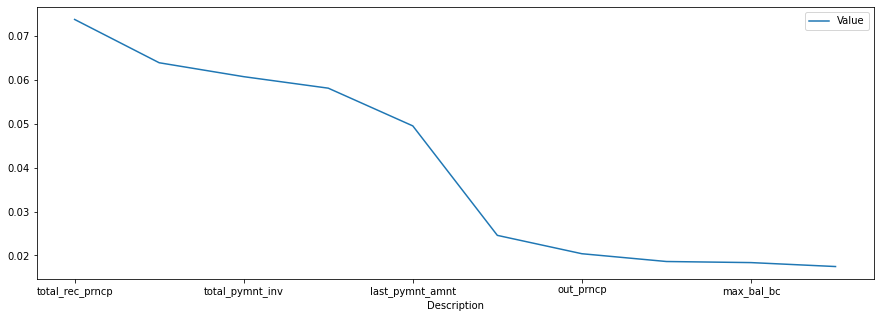

In [22]:
## Visualizing the data.
importance_sorted_df[0:10].plot(x="Description", y="Value", figsize=(15,5))

### Easy Ensemble Classifier

In [23]:
# Train the Classifier
## Copy/pasted eec definition from study group chat.

eec = EasyEnsembleClassifier(n_estimators=100, random_state=1)
eec.fit(X_train, Y_train)

EasyEnsembleClassifier(n_estimators=100, random_state=1)

In [24]:
# Calculated the balanced accuracy score
## Done a few of these now.

Y_pred = eec.predict(X_test)
balanced_accuracy_score(Y_test, Y_pred)

0.925427358175101

In [25]:
# Display the confusion matrix
## Done a few of these now.

confusion_matrix(Y_test, Y_pred)

array([[   79,     8],
       [  979, 16139]], dtype=int64)

In [26]:
# Print the imbalanced classification report
## Done a few of these now.

print(classification_report_imbalanced(Y_test, Y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.07      0.91      0.94      0.14      0.93      0.85        87
          1       1.00      0.94      0.91      0.97      0.93      0.86     17118

avg / total       0.99      0.94      0.91      0.97      0.93      0.86     17205



### Final Questions

1. Which model had the best balanced accuracy score?

In [27]:
## With a score of 0.925 to 0.787, the eec beats the brfc handily.

2. Which model had the best recall score?

    YOUR ANSWER HERE.

3. Which model had the best geometric mean score?

    YOUR ANSWER HERE.

4. What are the top three features?

    YOUR ANSWER HERE.